In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os

# Concordance Testing Between Toil-rnaseq Versions

John Vivian <br>
2/11/2017

Ensure that the versions of toil-rnaseq are concordant.

TEST_208 = `toil-scripts==2.0.8` <br>
TEST_302 = `toil-rnaseq==3.0.2` <br>
TEST_310 = `toil-rnaseq==3.1.0`

## RSEM

In [4]:
rsem = {}
kallisto = {}
for sample in ['TEST_208', 'TEST_302', 'TEST_310']:
    rsem[sample] = pd.read_csv(sample + '/rsem/rsem_genes.results', sep='\t')
    kallisto[sample] = pd.read_csv(sample + '/kallisto/abundance.tsv', sep='\t')

### 2.0.8 and 3.0.2

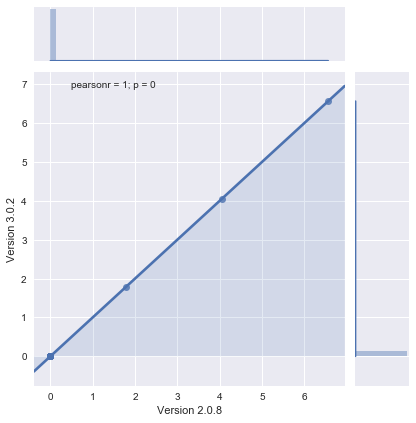

In [35]:
t208 = rsem['TEST_208'].expected_count.apply(lambda x: np.log(x+1))
t302 = rsem['TEST_302'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(t208, t302, kind='reg')
plt.xlabel('Version 2.0.8')
plt.ylabel('Version 3.0.2');

### 3.0.2 and 3.1.1

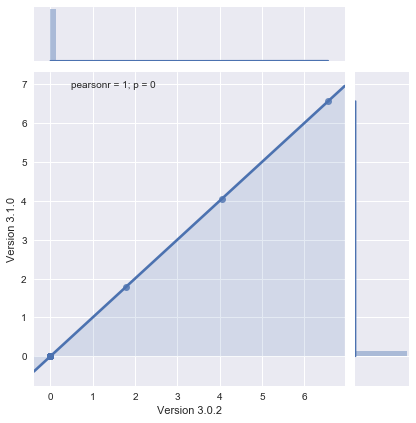

In [36]:
x = rsem['TEST_302'].expected_count.apply(lambda x: np.log(x+1))
y = rsem['TEST_310'].expected_count.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

By the commutative principle 2.0.8 == 3.1.0

# Kallisto

### 3.0.2 and 3.1.0

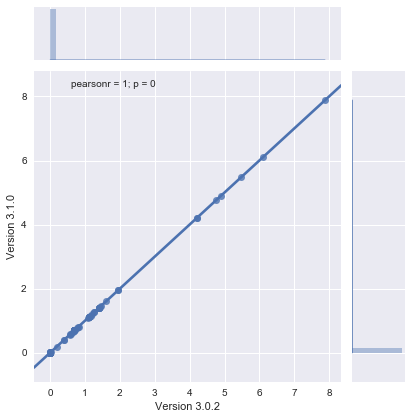

In [6]:
x = kallisto['TEST_302'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');

### 2.0.8 and 3.1.0

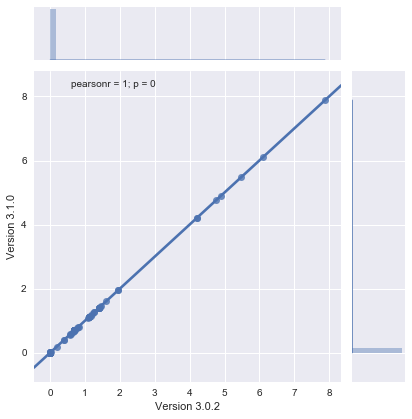

In [7]:
x = kallisto['TEST_208'].est_counts.apply(lambda x: np.log(x+1))
y = kallisto['TEST_310'].est_counts.apply(lambda x: np.log(x+1))

sns.jointplot(x, y, kind='reg')
plt.xlabel('Version 3.0.2')
plt.ylabel('Version 3.1.0');